Linguagem Natural parte 1: NLP com análise de sentimento

In [2]:
#pip install wordcloud
#pip install nltk

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

%matplotlib inline

In [4]:
resenha = pd.read_csv("C:/Users/marco/alura/Machine Learning Avançada/NLP/pt1/imdb-reviews-pt-br.csv")

In [5]:
classificacao = resenha['sentiment'].replace(['neg','pos'], [0,1])
resenha['classificacao'] = classificacao

C:\Users\marco\AppData\Local\Temp\ipykernel_8608\4090155684.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classificacao = resenha['sentiment'].replace(['neg','pos'], [0,1])


In [6]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [7]:
resenha

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [8]:
'''treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt, resenha.sentiment, random_state=42)'''

'treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt, resenha.sentiment, random_state=42)'

In [9]:
'''regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)'''

'regressao_logistica = LogisticRegression()\nregressao_logistica.fit(treino, classe_treino)\nacuracia = regressao_logistica.score(teste, classe_teste)\nprint(acuracia)'

In [10]:
print('Negativa \n')
print(resenha.text_pt[190])

Negativa 

Como muitos dos comentários acima de mim, também eu pensei que este era o filme de scifi médio, mas infelizmente não era. Eu achei bastante paternalista e, na verdade, pregando. Mas esse não é o único comentário. As cenas são muito artificiais, não como em scifi, como explicarei em alguns momentos. A próxima frase é um pequeno spoiler. O filme representa mais ou menos uma discussão entre dois grupos. A configuração física de uma discussão normalmente envolve dois ou três homens próximos um do outro, o do meio falando tipicamente. No pior dos casos, a outra parte é representada por uma pessoa. Também as entrevistas que os repórteres têm são muito artificiais, às vezes até mesmo pouco profissionais. Por exemplo, por vezes, a discussão é entre os repórteres, quero dizer, a partir de um ponto do entrevistado, akward. Além disso, os entrevistados sempre ficam calmos, dizem tudo sem emoções normais. Ou seja você não pode dizer se eles mentem ou não, são loucos ou não. Eles mostram

In [11]:
print('Positiva \n')
print(resenha.text_pt[42000])

Positiva 

Foi assim que me senti ao assistir este filme. Eu amei. Foi hilário. Mas eu senti como se eu estivesse tendo uma visão sorrateira da psicologia de alguém e depois rindo, uma vez que foi distorcida para criar um ponto interessante. Um amigo coloca desta forma: "Eu sinto como se tivéssemos invadido a casa de alguém e agora estão assistindo seus terríveis vídeos caseiros sem o seu conhecimento". Outro desses fatos é mais estranho do que os filmes de ficção. "Groovin Gary", o original "Beaver Kid", é um cara de cidade pequena que aparece em uma estação de TV nas proximidades, na esperança de entrar no filme - e ele certamente o faz, embora talvez não, como inicialmente esperava. Com grandes esperanças de fama e significado, ele convida Harris para vir e filmar uma verdadeira missão de talentos que ele organizou em sua cidade natal - encabeçada por seu próprio ato de arrastar "Olivia Newton-Don". O diretor, Trent Harris, faz um trabalho brilhante com essa história de evolução len

In [12]:
#Avaliar se estão desbalanceados pos/neg.

In [13]:
print(resenha.sentiment.value_counts())

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [14]:
#adicionado coluna para 0:neg e 1:pos

In [15]:
'''No próximo vídeo Bag of Words - um exemplo em Python, no minuto 9:00, usamos a função pandas.SparseDataFrame. Mas essa classe foi depreciada, portanto neste nosso exemplo devemos usar DataFrame.sparse.from_spmatrix. Abaixo segue a explicação de matriz esparsa e como utilizar o DataFrame.sparse.from_spmatrix.'''

'No próximo vídeo Bag of Words - um exemplo em Python, no minuto 9:00, usamos a função pandas.SparseDataFrame. Mas essa classe foi depreciada, portanto neste nosso exemplo devemos usar DataFrame.sparse.from_spmatrix. Abaixo segue a explicação de matriz esparsa e como utilizar o DataFrame.sparse.from_spmatrix.'

In [16]:
texto = ['assisti um filme bom', 'assisti um filme ruim']
vetorizar = CountVectorizer(lowercase=False)
#lowercase vem padrão True
bag_of_words = vetorizar.fit_transform(texto)

In [17]:
vetorizar.get_feature_names_out()

array(['assisti', 'bom', 'filme', 'ruim', 'um'], dtype=object)

In [18]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [19]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [20]:
matriz_esparsa

,assisti,bom,filme,ruim,um
0,1,1,1,0,1
1,1,0,1,1,1


In [21]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
#lowercase vem padrão True
bag_of_words = vetorizar.fit_transform(resenha.text_pt)

In [22]:
bag_of_words.shape

(49459, 50)

In [23]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, resenha.classificacao, random_state=42)

In [24]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.6583097452486858


In [25]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=42)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

In [26]:
print(classificar_texto(resenha,'text_pt', 'classificacao'))

0.6583097452486858


In [27]:
todas_palavras = ' '.join([texto for texto in resenha.text_pt])

In [28]:
len(todas_palavras)

63448424

In [31]:
nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, background_color='whitesmoke',
                             collocations=False, colormap='coolwarm').generate(todas_palavras)

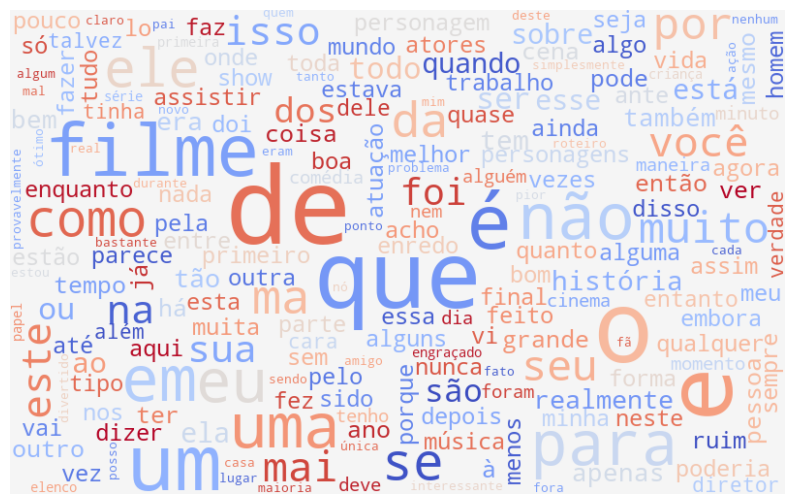

In [32]:
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_de_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
def nuvem_negativa(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    
    nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, background_color='whitesmoke',
                                 collocations=False, colormap='Reds').generate(todas_palavras)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_de_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nuvem Negativa')
    plt.show()

In [34]:
def nuvem_positiva(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    
    nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, background_color='whitesmoke',
                                 collocations=False, colormap='Blues').generate(todas_palavras)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_de_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nuvem Positiva')
    plt.show()

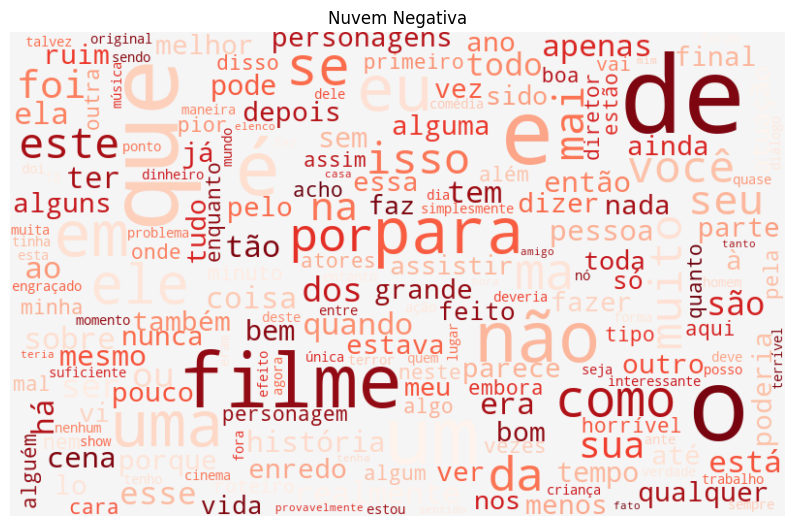

In [35]:
nuvem_negativa(resenha, 'text_pt')

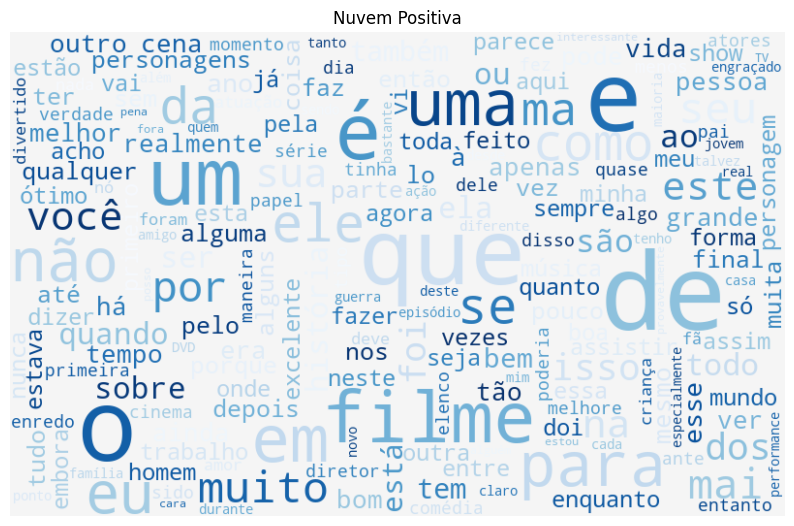

In [36]:
nuvem_positiva(resenha, 'text_pt')

In [61]:
#nltk.download('all')

In [38]:
frase = ['um filme ruim', 'um filme bom']
frequencia = nltk.FreqDist(frase)

In [39]:
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [40]:
from nltk import tokenize

In [41]:
frase2 = 'Eu sou a velocidade'

In [45]:
token_espaco = tokenize.WhitespaceTokenizer()
token_frase2 = token_espaco.tokenize(frase2)
token_frase2

['Eu', 'sou', 'a', 'velocidade']

In [46]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

['Mais',
 'uma',
 'vez,',
 'o',
 'Sr.',
 'Costner',
 'arrumou',
 'um',
 'filme',
 'por',
 'muito',
 'mais',
 'tempo',
 'do',
 'que',
 'o',
 'necessário.',
 'Além',
 'das',
 'terríveis',
 'seqüências',
 'de',
 'resgate',
 'no',
 'mar,',
 'das',
 'quais',
 'há',
 'muito',
 'poucas,',
 'eu',
 'simplesmente',
 'não',
 'me',
 'importei',
 'com',
 'nenhum',
 'dos',
 'personagens.',
 'A',
 'maioria',
 'de',
 'nós',
 'tem',
 'fantasmas',
 'no',
 'armário,',
 'e',
 'o',
 'personagem',
 'Costers',
 'é',
 'realizado',
 'logo',
 'no',
 'início,',
 'e',
 'depois',
 'esquecido',
 'até',
 'muito',
 'mais',
 'tarde,',
 'quando',
 'eu',
 'não',
 'me',
 'importava.',
 'O',
 'personagem',
 'com',
 'o',
 'qual',
 'deveríamos',
 'nos',
 'importar',
 'é',
 'muito',
 'arrogante',
 'e',
 'superconfiante,',
 'Ashton',
 'Kutcher.',
 'O',
 'problema',
 'é',
 'que',
 'ele',
 'sai',
 'como',
 'um',
 'garoto',
 'que',
 'pensa',
 'que',
 'é',
 'melhor',
 'do',
 'que',
 'qualquer',
 'outra',
 'pessoa',
 'ao',
 'seu',

In [47]:
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [48]:
df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
                             'Frequencia':list(frequencia.values())})

In [52]:
df_frequencia.nlargest(columns='Frequencia', n=20)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


[Text(0, 0.5, 'Contagem')]

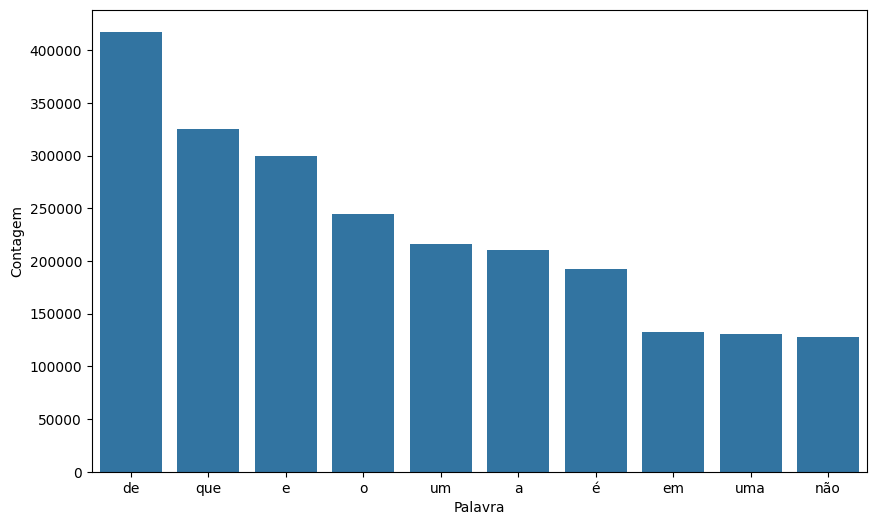

In [55]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequencia', n=10), x='Palavra', y='Frequencia')
ax.set(ylabel = 'Contagem')

In [59]:
def pareto(texto, coluna_texto, quantidade):
    
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)

    df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
                             'Frequencia':list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns='Frequencia', n=quantidade)
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df_frequencia, x='Palavra', y='Frequencia')
    ax.set(ylabel = 'Contagem')
    plt.show()

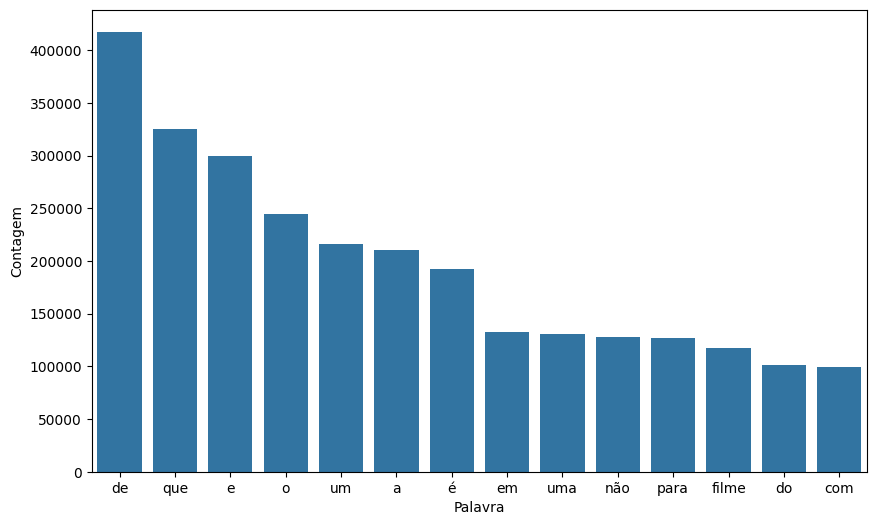

In [60]:
pareto(resenha, 'text_pt', 14)

In [62]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [63]:
print(palavras_irrelevantes)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [64]:
frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_1'] = frase_processada 

In [65]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [67]:
classificar_texto(resenha, 'tratamento_1', 'classificacao')

0.6810351799433886

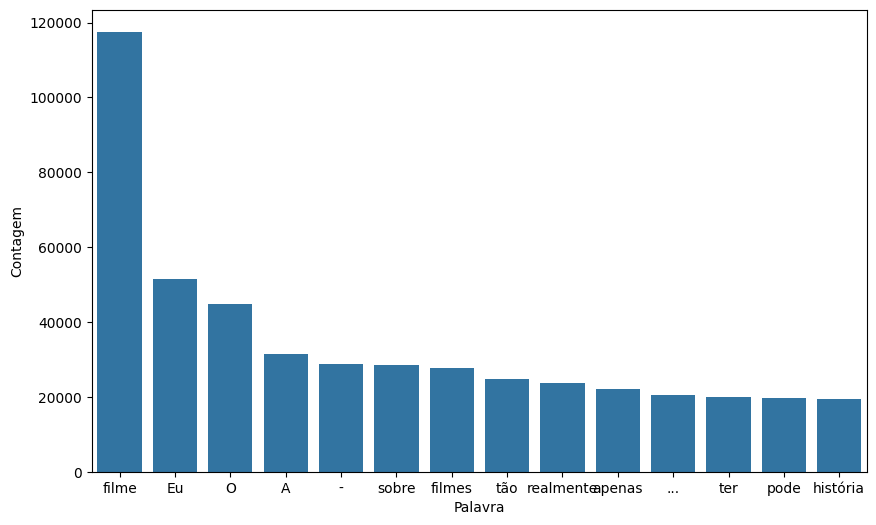

In [66]:
pareto(resenha, 'tratamento_1', 14)